In [1]:
!pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

1. Визуализация данных

In [3]:
# Загружаем курс EUR/USD за 3 года (2020–2022)
data = yf.download("EURUSD=X", start="2020-01-01", end="2023-01-01")
ts = data["Close"]  # Используем цену закрытия
ts.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Ticker,EURUSD=X
Date,
2020-01-01,1.122083
2020-01-02,1.122083
2020-01-03,1.117144
2020-01-06,1.116196
2020-01-07,1.119799


1.1 График исходного ряда

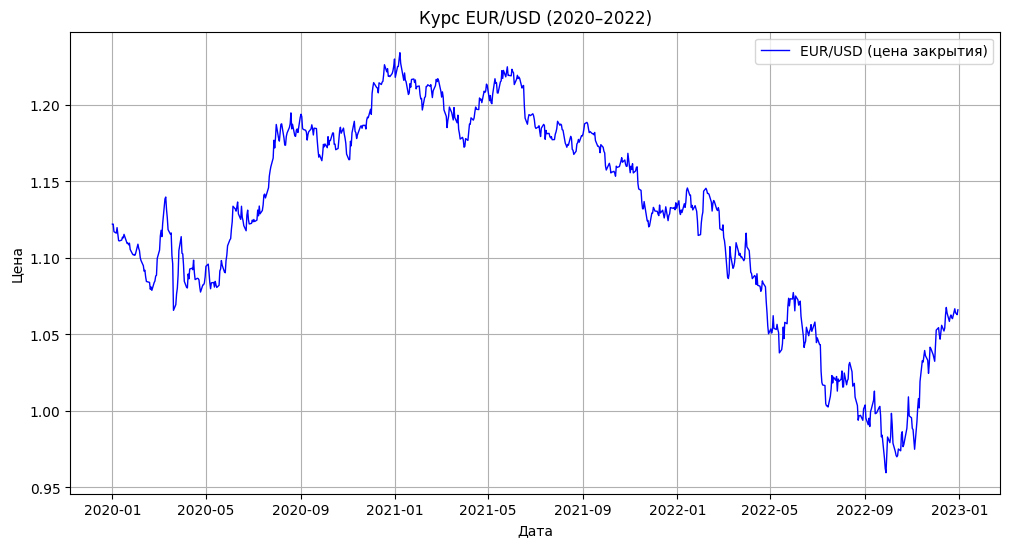

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(ts, label="EUR/USD (цена закрытия)", color="blue", linewidth=1)
plt.title("Курс EUR/USD (2020–2022)")
plt.xlabel("Дата")
plt.ylabel("Цена")
plt.grid()
plt.legend()
plt.show()

1.2 Графики исходного, первого порядка и второго.

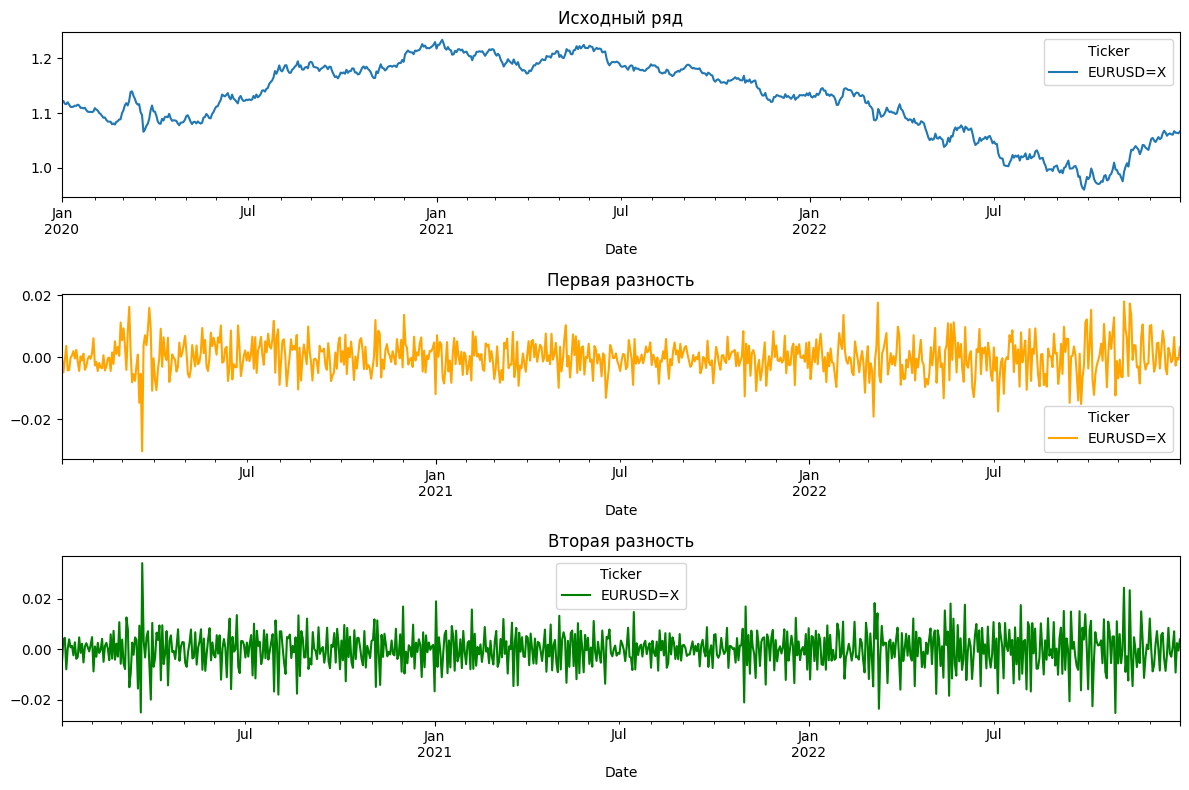

In [5]:
ts_diff1 = ts.diff().dropna()  # Первая разность
ts_diff2 = ts_diff1.diff().dropna()  # Вторая разность

# Графики
fig, axes = plt.subplots(3, 1, figsize=(12, 8))
ts.plot(ax=axes[0], title="Исходный ряд")
ts_diff1.plot(ax=axes[1], title="Первая разность", color="orange")
ts_diff2.plot(ax=axes[2], title="Вторая разность", color="green")
plt.tight_layout()
plt.show()

ACF

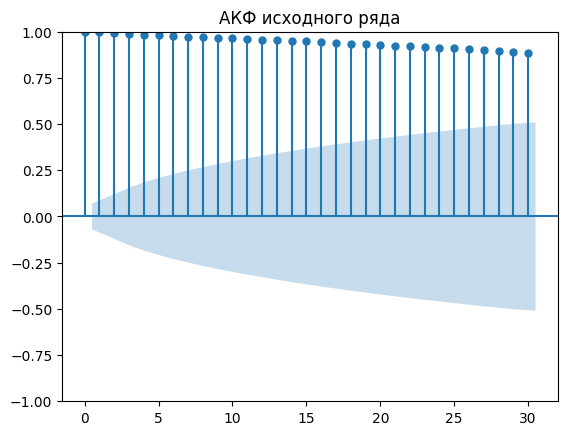

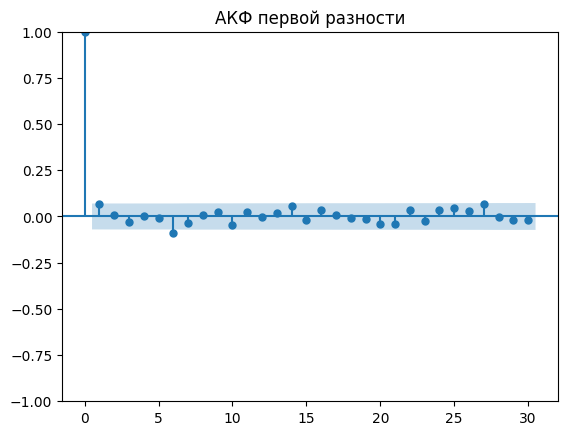

In [6]:
# Исходный ряд (без пропусков)
ts_clean = ts.dropna()

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts_clean, lags=30, alpha=0.05, title="АКФ исходного ряда")
plot_acf(ts_diff1, lags=30, alpha=0.05, title="АКФ первой разности")
plt.show()

ADF

In [7]:
def adf_test(series, name):
    result = adfuller(series)
    print(f"Результаты теста Дики-Фуллера для {name}:")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Критические значения:")
    for k, v in result[4].items():
        print(f"   {k}: {v:.4f}")

adf_test(ts, "исходного ряда")  # p-value > 0.05 → нестационарен
adf_test(ts_diff1, "первой разности")  # p-value < 0.05 → стационарен

Результаты теста Дики-Фуллера для исходного ряда:
ADF Statistic: -1.0100
p-value: 0.7496
Критические значения:
   1%: -3.4388
   5%: -2.8652
   10%: -2.5687
Результаты теста Дики-Фуллера для первой разности:
ADF Statistic: -26.1155
p-value: 0.0000
Критические значения:
   1%: -3.4388
   5%: -2.8652
   10%: -2.5687


Экспоненциальное сглаживание

In [9]:
def exponential_smoothing(series, alpha):
    result = [series.iloc[0]]
    for t in range(1, len(series)):
        result.append(alpha * series.iloc[t] + (1 - alpha) * result[t - 1])
    return pd.Series(result, index=series.index)

@interact(alpha=widgets.FloatSlider(value=0.3, min=0.01, max=0.99, step=0.01, description='α:'))
def plot_smoothing(alpha):
    smoothed = exponential_smoothing(ts, alpha)

    plt.figure(figsize=(12, 5))
    plt.plot(ts, label='Исходный ряд', color='blue', linewidth=1)
    plt.plot(smoothed, label=f'Сглажено (α={alpha:.2f})', color='pink', linewidth=2)
    plt.title('Экспоненциальное сглаживание с выбором α')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

interactive(children=(FloatSlider(value=0.3, description='α:', max=0.99, min=0.01, step=0.01), Output()), _dom…